In [1]:
import pandas as pd



In [2]:
train = pd.read_csv("train_labels.csv")
{ "number of classes": train['class'].nunique(), "number of unique images": train['filename'].nunique(), "number of bounding boxes": len(pd.DataFrame(train, columns=['xmin', 'ymin', 'xmax', 'ymax']))}

{'number of classes': 4,
 'number of unique images': 142,
 'number of bounding boxes': 170}

In [3]:
test = pd.read_csv("test_labels.csv")
{ "number of classes": test['class'].nunique(), "number of unique images": test['filename'].nunique(), "number of bounding boxes": len(pd.DataFrame(test, columns=['xmin', 'ymin', 'xmax', 'ymax']))}

{'number of classes': 4,
 'number of unique images': 7,
 'number of bounding boxes': 7}

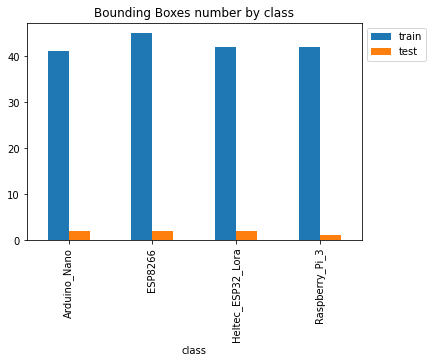

In [4]:
_ = pd.DataFrame({ 'train': pd.DataFrame(train, columns=['class', 'xmin', 'ymin', 'xmax', 'ymax']).dropna().groupby("class").size(), 'test': pd.DataFrame(test, columns=['class', 'xmin', 'ymin', 'xmax', 'ymax']).dropna().groupby("class").size()}).plot.bar(title="Bounding Boxes number by class").legend(bbox_to_anchor=(1, 1))

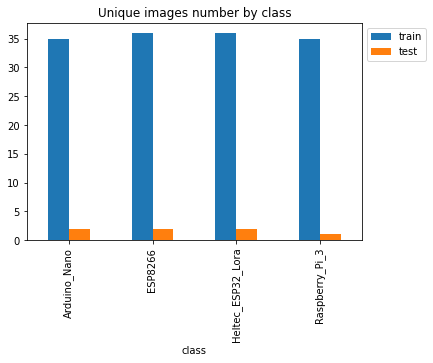

In [5]:

_ = pd.DataFrame({ 'train': train.drop_duplicates("filename").groupby("class").size(),
'test': test.drop_duplicates("filename").groupby("class").size()}).plot.bar(title="Unique images number by class").legend(bbox_to_anchor=(1, 1))


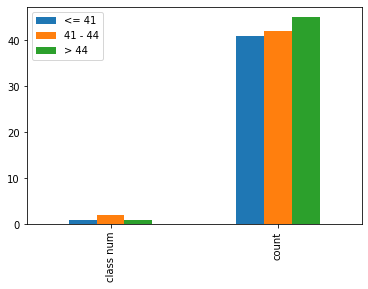

In [6]:

df = pd.DataFrame({ 'count': pd.DataFrame(train, columns=['class', 'xmin', 'ymin', 'xmax', 'ymax']).dropna().groupby('class').size()}).reset_index()
greater_than_41, leq_41 = [x for _, x in df.groupby(df['count'] <= 41)]
btwn_41_44, greater_than_44 = [x for _, x in df.groupby(greater_than_41['count'] > 44)]
btwn_41_44['count'].mean()
data = pd.DataFrame({
    "<= 41": {'class num': leq_41['count'].size, 'count': leq_41['count'].mean()},
    "41 - 44": {'class num': btwn_41_44['count'].size, 'count': btwn_41_44['count'].mean()},
    "> 44": {'class num': greater_than_44['count'].size, 'count': greater_than_44['count'].mean()}
    })
_ = data.plot.bar()

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img_names = [
    'IMG_20181228_104256.jpg',
    'IMG_20190104_163956.jpg'
]

def draw_bbox(img_name):
    save_img_path = f'bbox_images/{img_name}'
    bbox = train.loc[train['filename'] == img_name]
    # image = Image.open(f'train/{img_name}.jpg')
    image = cv2.imread(f'train/{img_name}')
    bbox_data = pd.DataFrame(train, columns=['class', 'xmin', 'ymin', 'xmax', 'ymax'])
    bbox_data = bbox_data.loc[train['filename'] == img_name].to_numpy()
    for bbox in bbox_data:
        color = np.random.uniform(0, 255, 3)
        img_class, xmin, ymin, xmax, ymax = bbox
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
        y = ymin - 15 if ymin - 15 > 15 else ymin + 15
        cv2.putText(image, img_class, (xmin, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    cv2.imwrite(save_img_path, image)
    image = Image.open(save_img_path)
    plt.imshow(image)

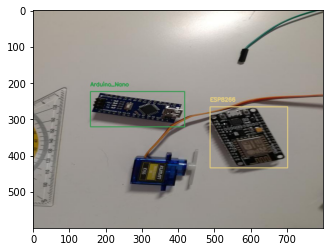

In [8]:
draw_bbox(img_names[0])

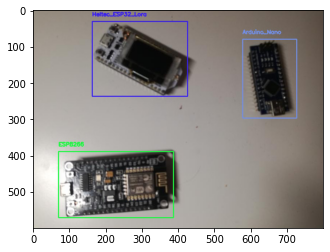

In [9]:
draw_bbox(img_names[1])